In [ ]:
import os
import pandas as pd
import numpy as np
import glob 

import matplotlib.pyplot as plt
from collections import defaultdict
import pickle
from PIL import Image
from IPython import display 

import sklearn.preprocessing

from keras import applications
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.models import Sequential, Model
from keras.layers import Dropout, Flatten, Dense, GlobalAveragePooling2D
from keras import backend as k
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, TensorBoard, EarlyStopping
from keras.models import load_model
from keras.utils import to_categorical
from keras.metrics import top_k_categorical_accuracy

In [2]:
def save_obj(obj, name ):
    with open(name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)
        
def load_obj(name):
    with open(name + '.pkl', 'rb') as f:
        return pickle.load(f)

# Preparation

## Inputs

Les tailles d'inputs sont réglementés pour les pre-trained NN comme suit :

<ul>
<li>(299, 299, 3) : Xception</li>
<li>(224, 224, 3) : VGG16 / VGG19</li>
<li>(224, 224, 3) : ResNet50</li>
<li>(299, 299, 3) : InceptionV3</li>
<li>(299, 299, 3) : InceptionResNetV2</li>
<li>(224, 224, 3) : MobileNet</li>
</ul>

In [25]:
# for filename in glob.glob('test/*.jpg'):
#     img = Image.open(filename)
#     img = img.resize((299, 299), Image.ANTIALIAS)
#     img.save(os.path.join("test/resized/", os.path.basename(filename)))
    
# for filename in glob.glob('train/*.jpg'):
#     img = Image.open(filename)
#     img = img.resize((299, 299), Image.ANTIALIAS)
#     img.save(os.path.join("train/resized/", os.path.basename(filename)))

# data augmentation

In [60]:
# a = label["id"].tolist()
# b = [x[::-1] for x in a]
# print(set(a) & set(b))

set()


In [72]:
# for filename in glob.glob('train/resized/*.jpg'):
#     name_img = os.path.basename(filename)[:-4]
#     path = os.path.dirname(filename)
#     img = Image.open(filename)
#     out = img.transpose(Image.FLIP_LEFT_RIGHT)
#     out.save(os.path.join(path, name_img[::-1]+".jpg"))

In [74]:
# label = pd.read_csv("labels.csv")
# label_2 = label.copy()

In [80]:
# label_2["id"] = label_2["id"].str[::-1]

In [82]:
# result = pd.concat([label, label_2])

In [84]:
# result.to_csv("label_augmented.csv")

In [3]:
label = pd.read_csv("label_augmented.csv", index_col=0)

# Extraction des features

cf prepare_matrices.py

# Evaluation des extractions

In [90]:
batch_size = 64
optimiser = "Adam"
metrics = ["accuracy", top3, top5]
epoch_max = 100
split_cv = 0.1
verbose = 0

results = {}

## InceptionResNetV2

In [4]:
data = np.load('preprocessed_train_InceptionResNetV2.npz')
X = data["X"]
y = data["y"]

In [5]:
label_binarizer = sklearn.preprocessing.LabelBinarizer()
y = label_binarizer.fit_transform(y)

In [6]:
# from sklearn.externals import joblib

# joblib.dump(label_binarizer, 'Label_binarizer.pkl')

['Label_binarizer.pkl']

In [93]:
model = Sequential()

model.add(Dense(512, input_dim=X.shape[1]))
model.add(Dropout(0.5))
model.add(Dense(512))
model.add(Dense(120, activation='softmax'))

early_stop = EarlyStopping(monitor='loss', min_delta=0, patience=10, verbose=0, mode='auto')

In [94]:
model.compile(loss = "categorical_crossentropy", optimizer = optimiser, metrics=metrics)
history = model.fit(  X, y, 
                      epochs=epoch_max, 
                      batch_size=batch_size, 
                      callbacks=[early_stop], 
                      verbose=verbose, 
                      shuffle=True, 
                      validation_split=split_cv
                     )

results["InceptionResNetV2"] = history.history

## InceptionV3

In [95]:
data = np.load('preprocessed_train_InceptionV3.npz')
X = data["X"]
y = data["y"]

y = label_binarizer.fit_transform(y)

In [96]:
model = Sequential()

model.add(Dense(512, input_dim=X.shape[1]))
model.add(Dropout(0.5))
model.add(Dense(512))
model.add(Dense(120, activation='softmax'))

early_stop = EarlyStopping(monitor='loss', min_delta=0, patience=10, verbose=0, mode='auto')

In [97]:
model.compile(loss = "categorical_crossentropy", optimizer = optimiser, metrics=metrics)
history = model.fit(  X, y, 
                      epochs=epoch_max, 
                      batch_size=batch_size, 
                      callbacks=[early_stop], 
                      verbose=verbose, 
                      shuffle=True, 
                      validation_split=split_cv
                     )

results["InceptionV3"] = history.history

## VGG16

In [98]:
data = np.load('preprocessed_train_VGG16.npz')
X = data["X"]
y = data["y"]

y = label_binarizer.fit_transform(y)

In [99]:
model = Sequential()

model.add(Dense(512, input_dim=X.shape[1]))
model.add(Dropout(0.5))
model.add(Dense(512))
model.add(Dense(120, activation='softmax'))

early_stop = EarlyStopping(monitor='loss', min_delta=0, patience=10, verbose=0, mode='auto')

In [100]:
model.compile(loss = "categorical_crossentropy", optimizer = optimiser, metrics=metrics)
history = model.fit(  X, y, 
                      epochs=epoch_max, 
                      batch_size=batch_size, 
                      callbacks=[early_stop], 
                      verbose=verbose, 
                      shuffle=True, 
                      validation_split=split_cv
                     )

results["VGG16"] = history.history

## Xception

In [101]:
data = np.load('preprocessed_train_Xception.npz')
X = data["X"]
y = data["y"]

y = label_binarizer.fit_transform(y)

In [102]:
model = Sequential()

model.add(Dense(512, input_dim=X.shape[1]))
model.add(Dropout(0.5))
model.add(Dense(512))
model.add(Dense(120, activation='softmax'))

early_stop = EarlyStopping(monitor='loss', min_delta=0, patience=10, verbose=0, mode='auto')

In [103]:
model.compile(loss = "categorical_crossentropy", optimizer = optimiser, metrics=metrics)
history = model.fit(  X, y, 
                      epochs=epoch_max, 
                      batch_size=batch_size, 
                      callbacks=[early_stop], 
                      verbose=verbose, 
                      shuffle=True, 
                      validation_split=split_cv
                     )

results["Xception"] = history.history

## ResNet50

In [104]:
data = np.load('preprocessed_train_ResNet50.npz')
X = data["X"]
y = data["y"]

y = label_binarizer.fit_transform(y)

In [105]:
model = Sequential()

model.add(Dense(512, input_dim=X.shape[1]))
model.add(Dropout(0.5))
model.add(Dense(512))
model.add(Dense(120, activation='softmax'))

early_stop = EarlyStopping(monitor='loss', min_delta=0, patience=10, verbose=0, mode='auto')

In [106]:
model.compile(loss = "categorical_crossentropy", optimizer = optimiser, metrics=metrics)
history = model.fit(  X, y, 
                      epochs=epoch_max, 
                      batch_size=batch_size, 
                      callbacks=[early_stop], 
                      verbose=verbose, 
                      shuffle=True, 
                      validation_split=split_cv
                     )

results["ResNet50"] = history.history

## MobileNet

In [107]:
data = np.load('preprocessed_train_MobileNet.npz')
X = data["X"]
y = data["y"]

y = label_binarizer.fit_transform(y)

In [108]:
model = Sequential()

model.add(Dense(512, input_dim=X.shape[1]))
model.add(Dropout(0.5))
model.add(Dense(512))
model.add(Dense(120, activation='softmax'))

early_stop = EarlyStopping(monitor='loss', min_delta=0, patience=10, verbose=0, mode='auto')

In [109]:
model.compile(loss = "categorical_crossentropy", optimizer = optimiser, metrics=metrics)
history = model.fit(  X, y, 
                      epochs=epoch_max, 
                      batch_size=batch_size, 
                      callbacks=[early_stop], 
                      verbose=verbose, 
                      shuffle=True, 
                      validation_split=split_cv
                     )

results["MobileNet"] = history.history

In [110]:
save_obj(results, "perf_extractor")

# Selection Extracteur

In [112]:
results = load_obj("perf_extractor")

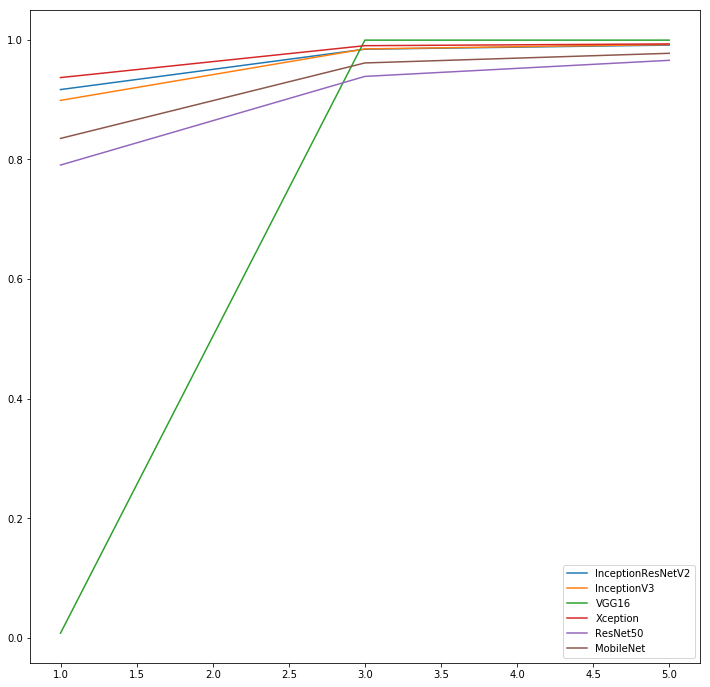

In [118]:
plt.figure(figsize=(12,12))
for model, history in results.items():
    plt.plot([1, 3, 5], [history["val_acc"][-1], history["val_top3"][-1], history["val_top5"][-1]] , label=model)
plt.legend()
plt.show()

# Fine Tuning Classifieur

In [4]:
data = np.load('preprocessed_train_Xception.npz')
X = data["X"]
y = data["y"]

label_binarizer = sklearn.preprocessing.LabelBinarizer()
y_bin = label_binarizer.fit_transform(y)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)
X_train, X_test, y_train_bin, y_test_bin = train_test_split(X, y_bin, test_size = 0.2, random_state=42)

## multinomial logistic regression (OVR-OVO Logisitc Regression)

In [8]:
from sklearn.linear_model import SGDClassifier

clf = SGDClassifier(loss="log")
clf.fit(X_train, y_train)

print("training score : %.3f" % (clf.score(X_test, y_test)))

C:\Anaconda501\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


training score : 0.941


In [9]:
pred = clf.predict_proba(X_test[:10])

In [10]:
pred.shape

(10, 120)

## GradientBoostingClassifier

In [5]:
# Non gérable

# from sklearn.ensemble import GradientBoostingClassifier

# clf = GradientBoostingClassifier()
# clf.fit(X_train, y_train)

# # print the training scores
# print("training score : %.3f" % (clf.score(X_test, y_test), multi_class))

## SVC

In [ ]:
from sklearn.svm import SVC

clf = SVC()
clf.fit(X_train, y_train)

# print the training scores
print("training score : %.3f" % (clf.score(X_test, y_test), multi_class))

## Random Forest

In [11]:
from sklearn.tree import ExtraTreeClassifier

clf = ExtraTreeClassifier(max_depth=20)
clf.fit(X_train, y_train)

# print the training scores
print("training score : %.3f" % (clf.score(X_test, y_test)))

training score : 0.611


Entre 20 et 50 de profondeur, la classification n'évolue plus

## NN

In [3]:
def top3(y_true, y_pred):
    return top_k_categorical_accuracy(y_true, y_pred, k=3)

def top5(y_true, y_pred):
    return top_k_categorical_accuracy(y_true, y_pred, k=5)

In [5]:
from keras import backend as K
from keras.utils.generic_utils import get_custom_objects
from keras.layers import Activation

def swish(x):
    return x*K.sigmoid(x)

get_custom_objects().update({'custom_activation': swish})

In [16]:
batch_size = 64
optimiser = "Adadelta"
metrics = ["accuracy", top3, top5]
epoch_max = 100
split_cv = 0.1
verbose = 1

model = Sequential()

# 512 - D05 - 256 - 120 - Soft => 93,37% (loss = 0.546)
# 350 - D05 - 250 - D02 - 120 - Soft => 93,39% (loss = 0.43278)
# 250 - D02 - 120 - Soft => 94.01% (loss = 0.310)
# 200 - D03 - 120 - Soft => 94.59% (loss = 0.337)
# 200+elu - D03 - 120 - Soft => 95.55% (loss = 0.274)
# 250+elu - D02 - 120 - Soft => 95.33% (loss = 0.289)
# 200+swish - D02 - 120 - Soft => 95.64% (loss = 0.287)
# 200+relu - D02 - 120 - Soft => 95.79% (loss = 0.233)

model.add(Dense(200, input_dim=X.shape[1], activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(120, activation='softmax'))

early_stop = EarlyStopping(monitor='val_loss', min_delta=0, patience=3, verbose=0, mode='auto')

model.compile(loss = "categorical_crossentropy", optimizer=optimiser, metrics=metrics)
model.fit(X_train, y_train_bin, 
          epochs=epoch_max, 
          batch_size=batch_size, 
          callbacks=[early_stop], 
          verbose=verbose, 
          shuffle=True, 
          validation_split=split_cv
         )
model.evaluate(X_test, y_test_bin)

Train on 14719 samples, validate on 1636 samples
Epoch 1/100
14719/14719 [==============================] - 2s 110us/step - loss: 1.6805 - acc: 0.7112 - top3: 0.8482 - top5: 0.8774 - val_loss: 0.4909 - val_acc: 0.8839 - val_top3: 0.9762 - val_top5: 0.9908
Epoch 2/100
14719/14719 [==============================] - 1s 93us/step - loss: 0.4335 - acc: 0.8837 - top3: 0.9803 - top5: 0.9902 - val_loss: 0.3895 - val_acc: 0.8955 - val_top3: 0.9774 - val_top5: 0.9902
Epoch 3/100
14719/14719 [==============================] - 1s 95us/step - loss: 0.3461 - acc: 0.8994 - top3: 0.9862 - top5: 0.9942 - val_loss: 0.3426 - val_acc: 0.9053 - val_top3: 0.9792 - val_top5: 0.9902
Epoch 4/100
14719/14719 [==============================] - 1s 95us/step - loss: 0.2992 - acc: 0.9087 - top3: 0.9893 - top5: 0.9960 - val_loss: 0.3246 - val_acc: 0.9010 - val_top3: 0.9817 - val_top5: 0.9921
Epoch 5/100
14719/14719 [==============================] - 1s 98us/step - loss: 0.2620 - acc: 0.9211 - top3: 0.9908 - top5: 0.

[0.16181233224629132,
 0.95597945718200839,
 0.99584250427977505,
 0.99804353142577651]

In [17]:
from keras.models import load_model

model.save('final_classifier.h5')

# Pour Kaggle

In [18]:
data = np.load('preprocessed_test_Xception.npz')
X = data["X"]
img_id = data["y"]

In [19]:
model = load_model('final_classifier.h5', custom_objects={'top3': top3, "top5" : top5})
pred = model.predict(X)

In [14]:
# pred = clf.predict_proba(X)

In [20]:
df = pd.DataFrame(pred)
df["id"] = img_id
df = df.set_index("id")
df.columns = label_binarizer.classes_

In [21]:
df = df.round(3)
df.to_csv("submission.csv")

In [22]:
df

,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,beagle,...,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier
id,,,,,,,,,,,,,,,,,,,,,
000621fb3cbb32d8935728e48679680e,0.0,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.0,0.0,...,0.000,0.000,0.0,0.0,0.0,0.000,0.0,0.000,0.000,0.0
00102ee9d8eb90812350685311fe5890,0.0,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.0,0.0,...,0.000,0.000,0.0,0.0,0.0,0.000,0.0,0.000,0.000,0.0
0012a730dfa437f5f3613fb75efcd4ce,0.0,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.0,0.0,...,0.000,0.000,0.0,0.0,0.0,0.000,0.0,0.000,0.000,0.0
001510bc8570bbeee98c8d80c8a95ec1,0.0,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.0,0.0,...,0.000,0.000,0.0,0.0,0.0,0.000,0.0,0.000,0.000,0.0
001a5f3114548acdefa3d4da05474c2e,0.0,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.0,0.0,...,0.000,0.000,0.0,0.0,0.0,0.000,0.0,0.000,0.000,0.0
00225dcd3e4d2410dd53239f95c0352f,0.0,0.001,0.000,0.000,0.000,0.0,0.000,0.000,0.0,0.0,...,0.000,0.000,0.0,0.0,0.0,0.000,0.0,0.000,0.000,0.0
002c2a3117c2193b4d26400ce431eebd,0.0,0.000,0.000,0.000,0.000,0.0,0.998,0.000,0.0,0.0,...,0.000,0.000,0.0,0.0,0.0,0.000,0.0,0.000,0.000,0.0
002c58d413a521ae8d1a5daeb35fc803,0.0,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.0,0.0,...,0.000,0.000,0.0,0.0,0.0,0.000,0.0,0.000,0.000,0.0
002f80396f1e3db687c5932d7978b196,0.0,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.0,0.0,...,0.000,0.000,0.0,0.0,0.0,0.000,0.0,0.000,0.000,0.0
